In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import preprocessing
from sklearn import utils

import sklearn.metrics as metrics
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import neighbors
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR

from sklearn.metrics import accuracy_score

#from sklearn import datasets
from sklearn.model_selection import cross_val_score # for cross validation purpose
from sklearn.model_selection import cross_validate # for cross validation and multiple evaluation
from sklearn.metrics import confusion_matrix
#%reload_ext memory_profiler

# Load dataset

In [2]:
churn_data = pd.read_csv(r'C:\Users\Ch. Muhammad Sajjad\Desktop\Bilal Data\Dataset for classification (1)/WA_Fn-UseC_-Telco-Customer-Churn.csv')
churn_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# Exploratory data analysis ---Data preprocessing

In [3]:
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
churn_data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [5]:
print(churn_data.duplicated().sum())

0


In [6]:
churn_data.shape

(7043, 21)

In [7]:
print(churn_data.isnull().sum())

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [8]:
print(churn_data.isna().sum())

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [9]:
churn_data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

# Dropping irrelevant column

In [10]:
churn_data.drop(columns = ['customerID'], inplace = True)

# Mapping variables

In [11]:
churn_data['gender']= churn_data['gender'].map({'Female':1,'Male':0})
churn_data['Partner']= churn_data['Partner'].map({'Yes':1,'No':0})
churn_data['Dependents']= churn_data['Dependents'].map({'Yes':1,'No':0})
churn_data['PhoneService']= churn_data['PhoneService'].map({'Yes':1,'No':0})
churn_data['PaperlessBilling']= churn_data['PaperlessBilling'].map({'Yes':1,'No':0})

In [12]:
churn_data['Churn']=churn_data['Churn'].map({'Yes':1,'No':0})

In [13]:
churn_data= churn_data.replace(to_replace='No phone service', value='No')
churn_data= churn_data.replace(to_replace='No internet service',value='No')

In [14]:
churn_data['MultipleLines']= churn_data['MultipleLines'].map({'Yes':1,'No':0})
churn_data['OnlineSecurity']= churn_data['OnlineSecurity'].map({'Yes':1,'No':0})
churn_data['OnlineBackup']= churn_data['OnlineBackup'].map({'Yes':1,'No':0})
churn_data['DeviceProtection']= churn_data['DeviceProtection'].map({'Yes':1,'No':0})
churn_data['TechSupport']= churn_data['TechSupport'].map({'Yes':1,'No':0})
churn_data['StreamingTV']= churn_data['StreamingTV'].map({'Yes':1,'No':0})
churn_data['StreamingMovies']= churn_data['StreamingMovies'].map({'Yes':1,'No':0})

In [15]:
churn_data.head(10)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1,0,1,0,1,0,0,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,0,0,0,0,34,1,0,DSL,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.5,0
2,0,0,0,0,2,1,0,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,0,0,0,0,45,0,0,DSL,1,0,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,1,0,0,0,2,1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1
5,1,0,0,0,8,1,1,Fiber optic,0,0,1,0,1,1,Month-to-month,1,Electronic check,99.65,820.5,1
6,0,0,0,1,22,1,1,Fiber optic,0,1,0,0,1,0,Month-to-month,1,Credit card (automatic),89.10,1949.4,0
7,1,0,0,0,10,0,0,DSL,1,0,0,0,0,0,Month-to-month,0,Mailed check,29.75,301.9,0
8,1,0,1,0,28,1,1,Fiber optic,0,0,1,1,1,1,Month-to-month,1,Electronic check,104.80,3046.05,1
9,0,0,0,1,62,1,0,DSL,1,1,0,0,0,0,One year,0,Bank transfer (automatic),56.15,3487.95,0


# Converting type of Total Charges string to float

In [16]:
# Converting DataFrame column elements from string to float using the following code line :


l1 = [len(i.split()) for i in churn_data['TotalCharges']]
l2 = [i for i in range(len(l1)) if l1[i] != 1]
print('Index Positions with empty spaces : ',*l2)

for i in l2:
    churn_data.loc[i,'TotalCharges'] = churn_data.loc[(i-1),'TotalCharges']
    
churn_data['TotalCharges'] = churn_data['TotalCharges'].astype(float)

Index Positions with empty spaces :  488 753 936 1082 1340 3331 3826 4380 5218 6670 6754


# Checking outliers

<AxesSubplot:>

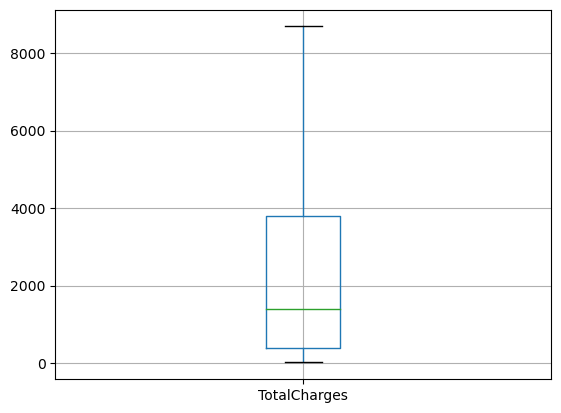

In [17]:
churn_data.boxplot(['TotalCharges'])

<AxesSubplot:>

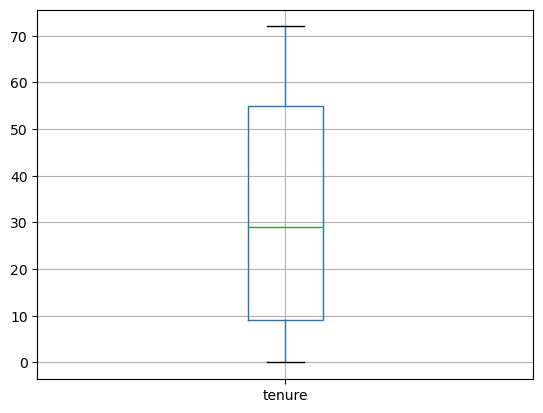

In [18]:
churn_data.boxplot(['tenure'])

<AxesSubplot:>

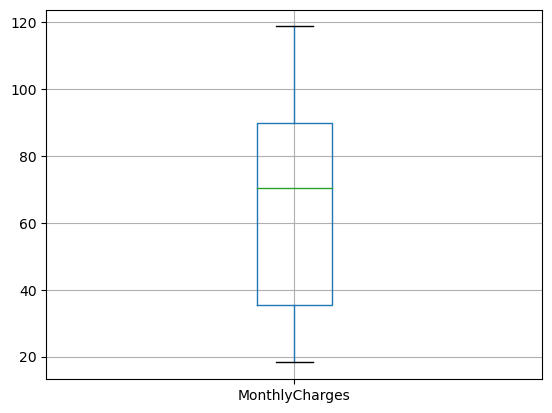

In [19]:
churn_data.boxplot(['MonthlyCharges'])

# onehotencode variable of IVs i.e. (Internet Service, Contract and Payment Method)

In [20]:
# onehotencode variable of nationality
churn_data_encoded = pd.get_dummies(churn_data, columns=['InternetService','Contract','PaymentMethod'])
print(churn_data_encoded.columns.values)
churn_data_encoded.head()

['gender' 'SeniorCitizen' 'Partner' 'Dependents' 'tenure' 'PhoneService'
 'MultipleLines' 'OnlineSecurity' 'OnlineBackup' 'DeviceProtection'
 'TechSupport' 'StreamingTV' 'StreamingMovies' 'PaperlessBilling'
 'MonthlyCharges' 'TotalCharges' 'Churn' 'InternetService_DSL'
 'InternetService_Fiber optic' 'InternetService_No'
 'Contract_Month-to-month' 'Contract_One year' 'Contract_Two year'
 'PaymentMethod_Bank transfer (automatic)'
 'PaymentMethod_Credit card (automatic)' 'PaymentMethod_Electronic check'
 'PaymentMethod_Mailed check']


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,1,0,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
1,0,0,0,0,34,1,0,1,0,1,...,1,0,0,0,1,0,0,0,0,1
2,0,0,0,0,2,1,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
3,0,0,0,0,45,0,0,1,0,1,...,1,0,0,0,1,0,1,0,0,0
4,1,0,0,0,2,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0


# Standardization/ Normaalization of variables

In [21]:
#standardize the variables

scaler = StandardScaler()
scaler.fit(churn_data_encoded)
churn_data_encoded = scaler.transform(churn_data_encoded)
churn_data_encoded = pd.DataFrame(churn_data_encoded, columns = ['gender', 'SeniorCitizen' ,'Partner', 'Dependents', 'tenure', 'PhoneService',
 'MultipleLines' ,'OnlineSecurity' ,'OnlineBackup' ,'DeviceProtection',
 'TechSupport' ,'StreamingTV' ,'StreamingMovies' ,'PaperlessBilling',
 'MonthlyCharges' ,'TotalCharges' ,'Churn' ,'InternetService_DSL',
 'InternetService_Fiber optic' ,'InternetService_No',
 'Contract_Month-to-month', 'Contract_One year', 'Contract_Two year',
 'PaymentMethod_Bank transfer (automatic)',
 'PaymentMethod_Credit card (automatic)' ,'PaymentMethod_Electronic check',
 'PaymentMethod_Mailed check'])

# declaring IVs and DV

In [22]:
ivs = churn_data_encoded[['gender', 'SeniorCitizen' ,'Partner', 'Dependents', 'tenure', 'PhoneService',
 'MultipleLines' ,'OnlineSecurity' ,'OnlineBackup' ,'DeviceProtection',
 'TechSupport' ,'StreamingTV' ,'StreamingMovies' ,'PaperlessBilling',
 'MonthlyCharges' ,'TotalCharges' ,'InternetService_DSL',
 'InternetService_Fiber optic' ,'InternetService_No',
 'Contract_Month-to-month', 'Contract_One year', 'Contract_Two year',
 'PaymentMethod_Bank transfer (automatic)',
 'PaymentMethod_Credit card (automatic)' ,'PaymentMethod_Electronic check',
 'PaymentMethod_Mailed check']]
dv = churn_data_encoded['Churn']

In [23]:
ivs

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1.009559,-0.439916,1.034530,-0.654012,-1.277445,-3.054010,-0.854176,-0.633933,1.378241,-0.723968,...,1.381712,-0.885660,-0.525927,0.904184,-0.514249,-0.562975,-0.529885,-0.525047,1.406418,-0.544807
1,-0.990532,-0.439916,-0.966622,-0.654012,0.066327,0.327438,-0.854176,1.577454,-0.725563,1.381277,...,1.381712,-0.885660,-0.525927,-1.105970,1.944582,-0.562975,-0.529885,-0.525047,-0.711026,1.835513
2,-0.990532,-0.439916,-0.966622,-0.654012,-1.236724,0.327438,-0.854176,1.577454,1.378241,-0.723968,...,1.381712,-0.885660,-0.525927,0.904184,-0.514249,-0.562975,-0.529885,-0.525047,-0.711026,1.835513
3,-0.990532,-0.439916,-0.966622,-0.654012,0.514251,-3.054010,-0.854176,1.577454,-0.725563,1.381277,...,1.381712,-0.885660,-0.525927,-1.105970,1.944582,-0.562975,1.887201,-0.525047,-0.711026,-0.544807
4,1.009559,-0.439916,-0.966622,-0.654012,-1.236724,0.327438,-0.854176,-0.633933,-0.725563,-0.723968,...,-0.723740,1.129102,-0.525927,0.904184,-0.514249,-0.562975,-0.529885,-0.525047,1.406418,-0.544807
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,-0.990532,-0.439916,1.034530,1.529024,-0.340876,0.327438,1.170719,1.577454,-0.725563,1.381277,...,1.381712,-0.885660,-0.525927,-1.105970,1.944582,-0.562975,-0.529885,-0.525047,-0.711026,1.835513
7039,1.009559,-0.439916,1.034530,1.529024,1.613701,0.327438,1.170719,-0.633933,1.378241,1.381277,...,-0.723740,1.129102,-0.525927,-1.105970,1.944582,-0.562975,-0.529885,1.904590,-0.711026,-0.544807
7040,1.009559,-0.439916,1.034530,1.529024,-0.870241,-3.054010,-0.854176,1.577454,-0.725563,-0.723968,...,1.381712,-0.885660,-0.525927,0.904184,-0.514249,-0.562975,-0.529885,-0.525047,1.406418,-0.544807
7041,-0.990532,2.273159,1.034530,-0.654012,-1.155283,0.327438,1.170719,-0.633933,-0.725563,-0.723968,...,-0.723740,1.129102,-0.525927,0.904184,-0.514249,-0.562975,-0.529885,-0.525047,-0.711026,1.835513


In [24]:
dv.describe

<bound method NDFrame.describe of 0      -0.601023
1      -0.601023
2       1.663829
3      -0.601023
4       1.663829
          ...   
7038   -0.601023
7039   -0.601023
7040   -0.601023
7041    1.663829
7042   -0.601023
Name: Churn, Length: 7043, dtype: float64>

In [25]:
print('the shape of IVs is: ', ivs.shape)
print('the shape of DV is: ', dv.shape)
print(ivs.head())
print(dv.head())

the shape of IVs is:  (7043, 26)
the shape of DV is:  (7043,)
     gender  SeniorCitizen   Partner  Dependents    tenure  PhoneService  \
0  1.009559      -0.439916  1.034530   -0.654012 -1.277445     -3.054010   
1 -0.990532      -0.439916 -0.966622   -0.654012  0.066327      0.327438   
2 -0.990532      -0.439916 -0.966622   -0.654012 -1.236724      0.327438   
3 -0.990532      -0.439916 -0.966622   -0.654012  0.514251     -3.054010   
4  1.009559      -0.439916 -0.966622   -0.654012 -1.236724      0.327438   

   MultipleLines  OnlineSecurity  OnlineBackup  DeviceProtection  ...  \
0      -0.854176       -0.633933      1.378241         -0.723968  ...   
1      -0.854176        1.577454     -0.725563          1.381277  ...   
2      -0.854176        1.577454      1.378241         -0.723968  ...   
3      -0.854176        1.577454     -0.725563          1.381277  ...   
4      -0.854176       -0.633933     -0.725563         -0.723968  ...   

   InternetService_DSL  InternetService_Fi

In [26]:
dv.head()

0   -0.601023
1   -0.601023
2    1.663829
3   -0.601023
4    1.663829
Name: Churn, dtype: float64

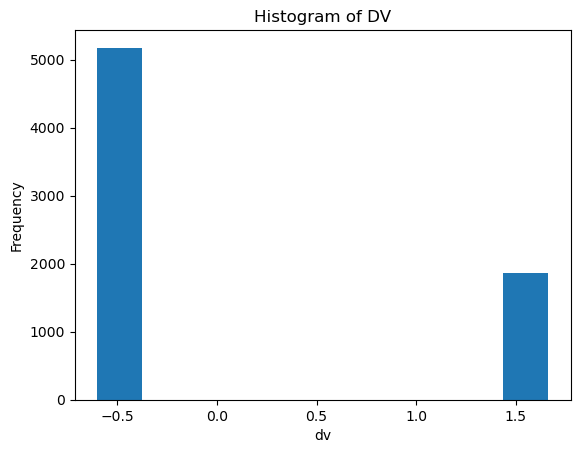

Quartiles:
0.25   -0.601023
0.50   -0.601023
0.75    1.663829
Name: Churn, dtype: float64
Descriptive Statistics:
count    7.043000e+03
mean     9.070789e-16
std      1.000071e+00
min     -6.010235e-01
25%     -6.010235e-01
50%     -6.010235e-01
75%      1.663829e+00
max      1.663829e+00
Name: Churn, dtype: float64


In [27]:
plt.hist(dv, bins=10)  # Adjust the number of bins as needed
plt.xlabel('dv')
plt.ylabel('Frequency')
plt.title('Histogram of DV')
plt.show()

# Calculate quartiles
quartiles = dv.quantile([0.25, 0.5, 0.75])
print("Quartiles:")
print(quartiles)

# Calculate descriptive statistics
statistics = dv.describe()
print("Descriptive Statistics:")
print(statistics)

# Transforming DV and mapping it to 0 and 1 based on median of DV

In [28]:
# Define the threshold as the median value of the DV
threshold = dv.median()

# Transform the DV into binary categories (0 and 1) based on the threshold
dv_transformed = dv.apply(lambda x: 1 if x > threshold else 0)

# Print the resulting dataframe
print(dv_transformed)


0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7043, dtype: int64


In [29]:
x_train, x_test, y_train, y_test = train_test_split(ivs, dv_transformed, test_size=0.2, random_state=42)

In [30]:
print('show data shape is: ', churn_data_encoded.shape)
print('x_train shape is: ',x_train.shape)
print('x_test shape is: ',x_test.shape)
print('y_train shape is: ',y_train.shape)
print('y_test shape is: ',y_test.shape)

show data shape is:  (7043, 27)
x_train shape is:  (5634, 26)
x_test shape is:  (1409, 26)
y_train shape is:  (5634,)
y_test shape is:  (1409,)


# Cross validation using K - Fold Split

In [61]:


# Define a list of classifier algorithms
classifiers = [
    LogisticRegression(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    SVC(),
    GaussianNB(),
    KNeighborsClassifier()    
]

# Create the K-fold cross-validator
kfold = KFold(n_splits=5, shuffle=True, random_state=42)  # Set the number of splits (K) as desired

# Perform K-fold cross-validation for each classifier
for classifier in classifiers:
    accuracy_scores = []  # List to store the accuracy scores for each fold

    for train_index, test_index in kfold.split(ivs):
        x_train, x_test = ivs.iloc[train_index], ivs.iloc[test_index]
        y_train, y_test = dv_transformed.iloc[train_index], dv_transformed.iloc[test_index]

        # Create and train the classifier
        classifier.fit(x_train, y_train)

        # Make predictions on the test set
        y_pred = classifier.predict(x_test)

        # Calculate accuracy and store it
        accuracy = accuracy_score(y_test, y_pred)
        accuracy_scores.append(accuracy)

    # Print the accuracy scores for each fold
    print(f"Classifier: {classifier.__class__.__name__}")
    for fold, accuracy in enumerate(accuracy_scores):
        print(f"Fold {fold+1} Accuracy: {accuracy}")

    # Calculate and print the average accuracy across all folds
    average_accuracy = sum(accuracy_scores) / len(accuracy_scores)
    print("Average Accuracy:", average_accuracy)
    print()


Classifier: LogisticRegression
Fold 1 Accuracy: 0.8218594748048261
Fold 2 Accuracy: 0.8090844570617459
Fold 3 Accuracy: 0.7998580553584103
Fold 4 Accuracy: 0.7897727272727273
Fold 5 Accuracy: 0.8110795454545454
Average Accuracy: 0.806330851990451

Classifier: DecisionTreeClassifier
Fold 1 Accuracy: 0.7324343506032647
Fold 2 Accuracy: 0.7366926898509581
Fold 3 Accuracy: 0.7331440738112136
Fold 4 Accuracy: 0.734375
Fold 5 Accuracy: 0.7166193181818182
Average Accuracy: 0.730653086489451

Classifier: RandomForestClassifier
Fold 1 Accuracy: 0.7970191625266146
Fold 2 Accuracy: 0.7998580553584103
Fold 3 Accuracy: 0.7885024840312278
Fold 4 Accuracy: 0.7855113636363636
Fold 5 Accuracy: 0.7919034090909091
Average Accuracy: 0.7925588949287051

Classifier: SVC
Fold 1 Accuracy: 0.8119233498935415
Fold 2 Accuracy: 0.801277501774308
Fold 3 Accuracy: 0.7877927608232789
Fold 4 Accuracy: 0.7840909090909091
Fold 5 Accuracy: 0.8103693181818182
Average Accuracy: 0.7990907679527712

Classifier: GaussianNB
F

C:\Users\Ch. Muhammad Sajjad\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Ch. Muhammad Sajjad\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no long

Classifier: KNeighborsClassifier
Fold 1 Accuracy: 0.7672107877927609
Fold 2 Accuracy: 0.7601135557132718
Fold 3 Accuracy: 0.7374024130589071
Fold 4 Accuracy: 0.7563920454545454
Fold 5 Accuracy: 0.7649147727272727
Average Accuracy: 0.7572067149493515



C:\Users\Ch. Muhammad Sajjad\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


# Model Evaluation

In [32]:
Accuracy_list=[]



def model_evaluation_accuracy(y_test, y_predictions):
    accuracy = accuracy_score(y_test, y_predictions)
    
    Accuracy_list.append(accuracy)
    print("Accuracy:",accuracy)

# Logistic Regression

In [33]:
%%timeit -n1 -r1
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
y_predictions = logreg.predict(x_test)
model_evaluation_accuracy(y_test, y_predictions)


Accuracy: 0.8218594748048261
27.9 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


# Random Forest Classifier

In [34]:
%%timeit -n1 -r1
rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)
y_predictions = rfc.predict(x_test)
model_evaluation_accuracy(y_test, y_predictions)

Accuracy: 0.7885024840312278
450 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


# Decision Tree Classifier

In [35]:
%%timeit -n1 -r1
dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train)
y_predictions = dtc.predict(x_test)
model_evaluation_accuracy(y_test, y_predictions)

Accuracy: 0.730305180979418
22.5 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


# Support Vector Classifier

In [36]:
%%timeit -n1 -r1

svc = SVC()
svc.fit(x_train, y_train)
y_predictions = svc.predict(x_test)
model_evaluation_accuracy(y_test, y_predictions)

Accuracy: 0.8119233498935415
1.07 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


 # Naive Bayes Classifier

In [37]:
%%timeit -n1 -r1
nb = GaussianNB()
nb.fit(x_train, y_train)
y_predictions = nb.predict(x_test)
model_evaluation_accuracy(y_test, y_predictions)

Accuracy: 0.7551454932576295
7.24 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


# K-Nearest Neighbors (KNN) Classifier

In [38]:
%%timeit -n1 -r1
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
y_predictions = knn.predict(x_test)
model_evaluation_accuracy(y_test, y_predictions)

Accuracy: 0.7679205110007097
234 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


C:\Users\Ch. Muhammad Sajjad\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [43]:
models_list_class = ['logreg','rfc','dtc','svc','nb','knn']

models_list_class


['logreg', 'rfc', 'dtc', 'svc', 'nb', 'knn']

In [44]:
Accuracy_list

[0.8218594748048261,
 0.7885024840312278,
 0.730305180979418,
 0.8119233498935415,
 0.7551454932576295,
 0.7679205110007097]

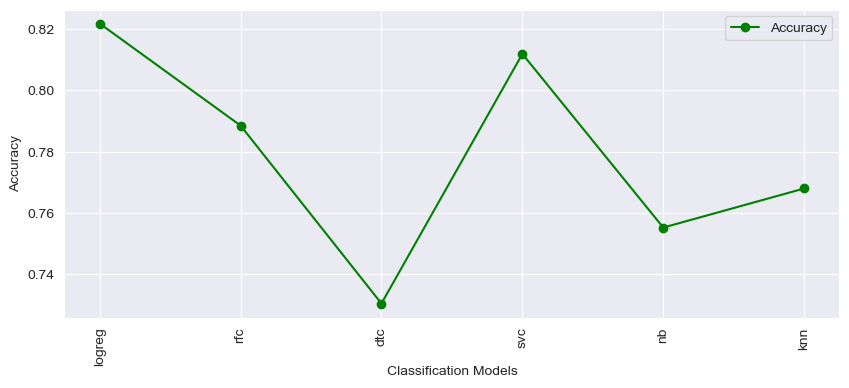

In [46]:
sns.set_style('darkgrid')

fig,(ax1)=plt.subplots(ncols=1,figsize=(10,4));
ax1.plot(Accuracy_list,color='green', label='Accuracy', marker="o")
ax1.legend()
ax1.set_xticks(ticks=range(len(Accuracy_list)))
ax1.set_xticklabels(models_list_class, rotation=90)
ax1.set_xlabel('Classification Models', labelpad=0)
ax1.set_ylabel('Accuracy')
plt.show()

# Model Evaluation

In [ ]:
MAE_list=[]
MSE_list=[]
RMSE_list=[]
R_Squared_list=[]


def model_evaluation(y_test, predictions):
    mae = metrics.mean_absolute_error(y_test, predictions)
    mse = metrics.mean_squared_error(y_test, predictions)
    rmse = np.sqrt(mse) # or mse**(0.5)  
    r2 = metrics.r2_score(y_test,predictions)
    
    MAE_list.append(mae)
    MSE_list.append(mse)
    RMSE_list.append(rmse)
    R_Squared_list.append(r2)
    
    print("Results of sklearn.metrics: \n")
    print("MAE:",mae)
    print("MSE:", mse)
    print("RMSE:", rmse)
    print("R-Squared:", r2)



# Multiple Linear Regression

In [47]:
regression_model = sm.OLS(y_train, x_train)
results = regression_model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Churn   R-squared (uncentered):                   0.203
Model:                            OLS   Adj. R-squared (uncentered):              0.200
Method:                 Least Squares   F-statistic:                              62.26
Date:                Wed, 17 May 2023   Prob (F-statistic):                   8.24e-256
Time:                        15:31:27   Log-Likelihood:                         -3618.5
No. Observations:                5634   AIC:                                      7283.
Df Residuals:                    5611   BIC:                                      7436.
Df Model:                          23                                                  
Covariance Type:            nonrobust                                                  
===========================================================================================================
                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
gender                                      0.0003      0.006      0.042      0.967      -0.012       0.012
SeniorCitizen                               0.0124      0.007      1.873      0.061      -0.001       0.025
Partner                                     0.0051      0.007      0.693      0.488      -0.009       0.020
Dependents                                 -0.0118      0.007     -1.635      0.102      -0.026       0.002
tenure                                     -0.0555      0.016     -3.412      0.001      -0.087      -0.024
PhoneService                                0.0128      0.036      0.352      0.725      -0.059       0.084
MultipleLines                               0.0379      0.017      2.276      0.023       0.005       0.071
OnlineSecurity                             -0.0174      0.016     -1.115      0.265      -0.048       0.013
OnlineBackup                                0.0027      0.016      0.165      0.869      -0.029       0.034
DeviceProtection                            0.0077      0.016      0.472      0.637      -0.024       0.040
TechSupport                                -0.0143      0.016     -0.908      0.364      -0.045       0.017
StreamingTV                                 0.0439      0.030      1.448      0.148      -0.016       0.103
StreamingMovies                             0.0519      0.030      1.715      0.086      -0.007       0.111
PaperlessBilling                            0.0205      0.007      3.036      0.002       0.007       0.034
MonthlyCharges                             -0.1326      0.182     -0.730      0.465      -0.489       0.223
TotalCharges                               -0.0892      0.019     -4.575      0.000      -0.127      -0.051
InternetService_DSL                        -0.0190      0.010     -1.920      0.055      -0.038       0.000
InternetService_Fiber optic                 0.1184      0.066      1.793      0.073      -0.011       0.248
InternetService_No                         -0.1207      0.070     -1.727      0.084      -0.258       0.016
Contract_Month-to-month                     0.0252      0.006      4.542      0.000       0.014       0.036
Contract_One year                          -0.0185      0.005     -4.068      0.000      -0.027      -0.010
Contract_Two year                          -0.0117      0.006     -1.987      0.047      -0.023      -0.000
PaymentMethod_Bank transfer (automatic)    -0.0076      0.005     -1.555      0.120      -0.017       0.002
PaymentMethod_Credit card (automatic)      -0.0087      0.005     -1.773      0.076      -0.018       0.001
PaymentMethod_Electronic check              0.0236      0.005      4

In [48]:
print(results.rsquared)
print(results.rsquared_adj)
print(results.pvalues)
print(results.params)

0.20333090150017719
0.20006528231188714
gender                                     0.966690
SeniorCitizen                              0.061108
Partner                                    0.488217
Dependents                                 0.102193
tenure                                     0.000648
PhoneService                               0.724937
MultipleLines                              0.022877
OnlineSecurity                             0.265083
OnlineBackup                               0.868633
DeviceProtection                           0.636750
TechSupport                                0.363960
StreamingTV                                0.147575
StreamingMovies                            0.086360
PaperlessBilling                           0.002404
MonthlyCharges                             0.465289
TotalCharges                               0.000005
InternetService_DSL                        0.054954
InternetService_Fiber optic                0.072992
InternetService_No      

In [49]:
predictions = results.predict(x_test)

In [50]:
model_evaluation(y_test, predictions)

Results of sklearn.metrics: 

MAE: 0.343601220313391
MSE: 0.20424290444449691
RMSE: 0.4519324113675594
R-Squared: -0.049301700649215796


# Support Vector Regression

In [51]:
%%timeit -n1 -r1

svr = SVR()
svr.fit(x_train, y_train)
predictions = svr.predict(x_test)
model_evaluation(y_test, predictions)

Results of sklearn.metrics: 

MAE: 0.2510338270626091
MSE: 0.14363165298784594
RMSE: 0.3789876686487912
R-Squared: 0.2620897251871921
1.25 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


# Decision Tree Regression

In [52]:
%%timeit -n1 -r1

dtr = DecisionTreeRegressor()
dtr.fit(x_train, y_train)
predictions = dtr.predict(x_test)
model_evaluation(y_test, predictions)

Results of sklearn.metrics: 

MAE: 0.2688668086113083
MSE: 0.26817679993691346
RMSE: 0.5178578955050444
R-Squared: -0.37776327169758783
21 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [53]:
models_list = ['mlr', 'svr', 'decisiontr']
models_list

['mlr', 'svr', 'decisiontr']

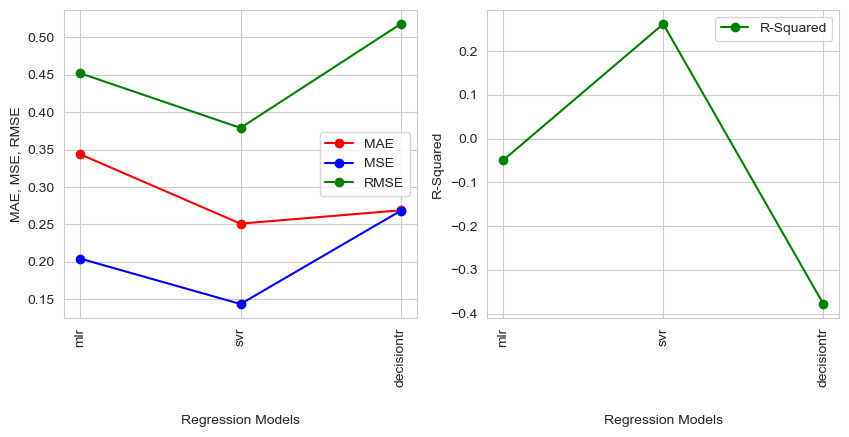

In [54]:
sns.set_style('whitegrid')

fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(10,4));
ax1.plot(MAE_list,color='red', label='MAE', marker="o")
ax1.plot(MSE_list, color='blue', label='MSE', marker="o")
ax1.plot(RMSE_list,color='green', label='RMSE', marker="o")
ax2.plot(R_Squared_list,  color='green', label='R-Squared', marker="o")
ax1.legend()
ax2.legend()
ax1.set_xticks(ticks=range(len(MAE_list)))
ax2.set_xticks(ticks=range(len(R_Squared_list)))
ax1.set_xticklabels(models_list, rotation=90)
ax2.set_xticklabels(models_list, rotation=90)
ax1.set_xlabel('Regression Models', labelpad=20)
ax2.set_xlabel('Regression Models', labelpad=20)
ax1.set_ylabel('MAE, MSE, RMSE')
ax2.set_ylabel('R-Squared')
plt.show()